In [1]:
from sklearn.datasets import *
from sklearn.model_selection import *
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.neighbors import *

In [2]:
iris_dataset = load_iris()

In [3]:
print("iris_dataset의 키: \n%s" %iris_dataset.keys())

iris_dataset의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
pd.DataFrame(iris_dataset["data"])

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
print(iris_dataset["DESCR"][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
print("타깃의 이름: %s" %(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [7]:
print("특성의 이름: \n%s" %(iris_dataset['feature_names']))

특성의 이름: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("data의 타입: %s" %(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


In [9]:
print("data의 크기: (%d, %d)" %(iris_dataset["data"].shape[0], iris_dataset["data"].shape[1]))

data의 크기: (150, 4)


In [10]:
pd.DataFrame(iris_dataset["data"]).head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
print("target의 타입: %s" %(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [12]:
print("data의 크기: %d" %(iris_dataset["target"].shape[0]))

data의 크기: 150


In [13]:
iris_dataset["target"].shape

(150,)

In [14]:
pd.DataFrame(iris_dataset["target"])

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [15]:
x_train, x_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"], random_state = 0)

In [16]:
print("X_train 크기: {}".format(x_train.shape))
print("y_train 크기: {}".format(y_train.shape))

X_train 크기: (112, 4)
y_train 크기: (112,)


In [17]:
print("X_test 크기: {}".format(x_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_test 크기: (38, 4)
y_test 크기: (38,)


### 데이터가 머신러닝에 적합한지 확인 - Y 에 따라 구분이 잘 되는가

#### X_train 데이터를 사용해 데이터프레임을 만든다

In [18]:
iris_dataframe = pd.DataFrame(x_train, columns = iris_dataset.feature_names)

In [19]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


#### 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF61D55710>,
      dtype=object)

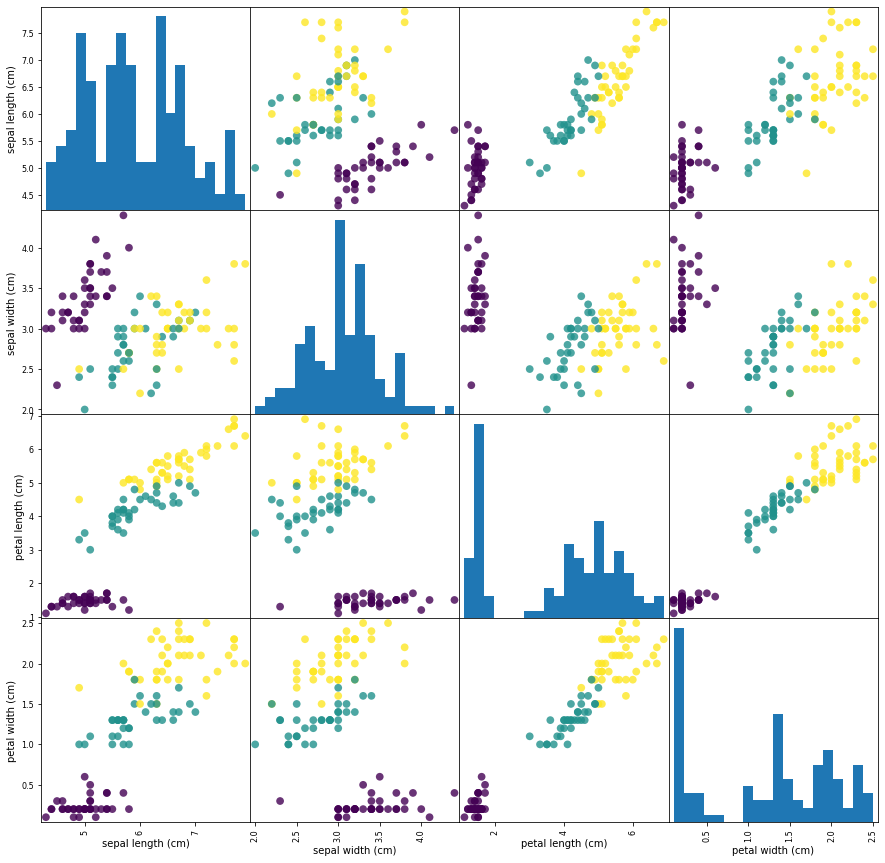

In [20]:
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (15, 15), 
                           marker = 'o', hist_kwds={'bins': 20}, s=60, alpha=.8)

### K-Nearest Neighbors, KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
print(knn.fit(x_train, y_train))

KNeighborsClassifier(n_neighbors=1)


In [23]:
x_new = np.array([[5, 2.9, 1, 0.2]])
print("x_new.shape: {}".format(x_new.shape))

x_new.shape: (1, 4)


In [24]:
prediction = knn.predict(x_new)
print("prediction: {}".format(prediction))

prediction: [0]


In [25]:
print("예측한 타깃의 이름: {}".format(iris_dataset['target_names'][prediction]))

예측한 타깃의 이름: ['setosa']


In [26]:
y_pred = knn.predict(x_test)
print("test set 예측: \n {}".format(y_pred))

test set 예측: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [27]:
print("테스트 세트의 정확도: {:.3f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.974


In [28]:
print("테스트 세트의 정확도: {:.3f}".format(knn.score(x_test, y_test)))

테스트 세트의 정확도: 0.974


C:\Riot Games\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


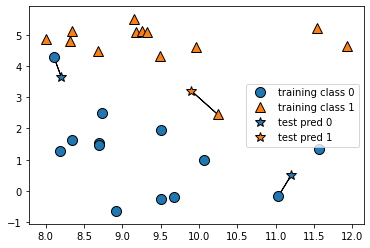

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

C:\Riot Games\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


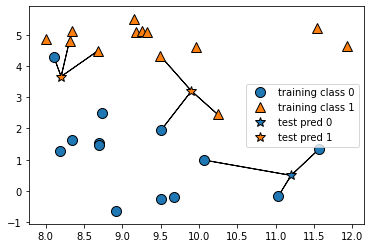

In [30]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [31]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Riot Games\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [32]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [34]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석

C:\Riot Games\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Riot Games\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Riot Games\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Riot Games\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Riot Games\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Riot Games\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current f

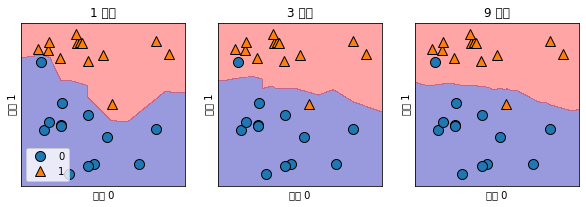

In [35]:
fix, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    axes[0].legend(loc=3)

In [36]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
   cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [37]:
training_accuracy = []
test_accuracy = []

In [38]:
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))


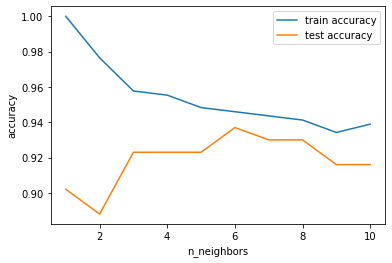

In [39]:
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

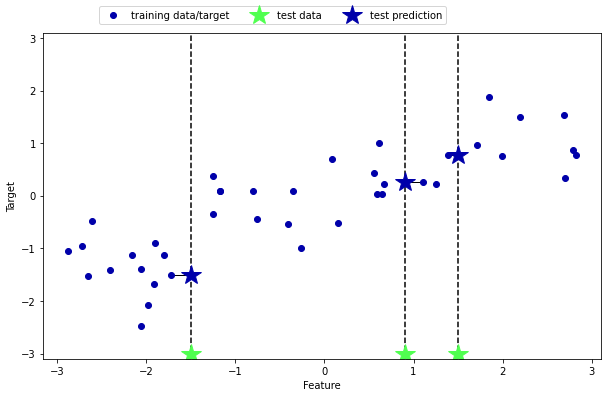

In [40]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

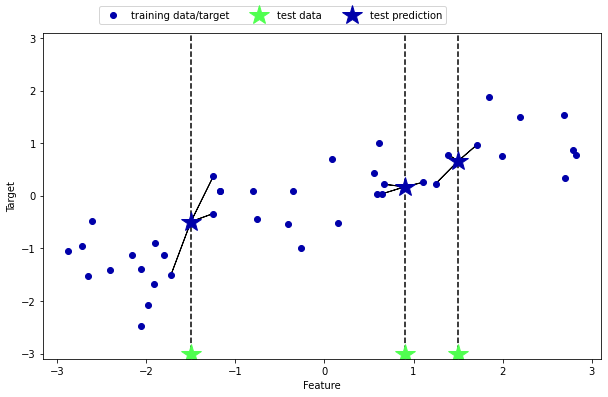

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [42]:
X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [43]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [44]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


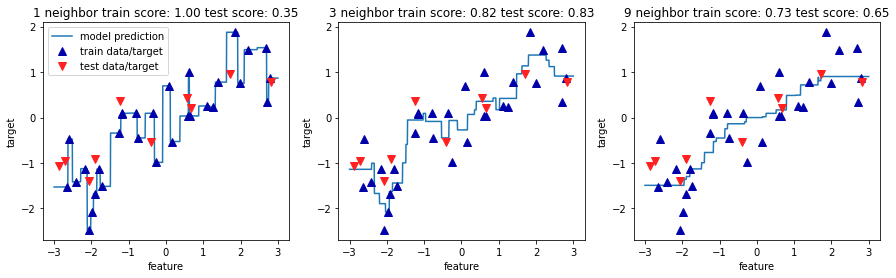

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    axes[0].legend(["model prediction", "train data/target", "test data/target"], 
               loc="best")